# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 9. Статистика и байесовские классификаторы.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 30 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

sns.set(palette='Set2')

---
### Задача 1.   

**a).** Пусть $X_1,...,X_n$ выборка из некоторого распределения $\mathsf{P}$, причем ${\sf D} X_1=\sigma^2<+\infty$, и $\sigma$ неизвестно.
Рассмотрим оценку $S^2 = \overline{X^2}-\overline{X}^2$ дисперсии $\sigma^2$.

Докажите, что $S^2=\frac1n\sum\limits_{i=1}^n\left(X_i-\overline{X}\right)^2$.

**b).** Оценка $\widehat{\theta}$ называется несмещенной оценкой параметра $\theta$ если для любого $\theta \in \Theta$ выполнено $\mathsf{E}_\theta \widehat{\theta} = \theta$. Иначе говоря, какое бы ни оказалось истинное значение параметра $\theta$, рассматривая оценку $\widehat{\theta}$ в среднем будем получать именно $\theta$.

Является ли статистика $S^2$ несмещенной оценкой $\sigma^2$?

*Подсказка.* Посчитайте математическое ожидание случайной величины $S^2$. Используйте для этого известные вам свойства математического ожидания.

![task1](img1.jpg)

![task1](img2.jpg)

 ---
### Задача 2.   
Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. В качестве оценок $\sigma^2$ обычно используют $S^2$ или $\frac{n}{n-1}S^2$. Что можно сказать про их несмещенность?

**Ответ:** $ S^2 $ - смещённая, а $ \frac{n}{n-1}S^2$ - несмещённая

**1.** Теперь проверьте это на практике. Для каждой из приведенных выше оценок $\widehat{\theta}$ выполните следующие действия.

* Вычислите $k = 500$ независимых оценок $\widehat{\theta}_1, ... , \widehat{\theta}_k$ по независимым выборкам $(X_1^1, ... , X_n^1), ... , (X_1^k, ... , X_n^k)$, сгенерированным из распределения $\mathcal{N}(0, \sigma^2)$. Для генерации выберите какое-то истинное значение $\sigma$. Далее вычислите среднее этих оценок, которое обозначим $\widetilde{\theta}$.

* Визуализируйте полученные значения, построив на **одном** графике точки $(\widehat{\theta}_1, $y$), ... , (\widehat{\theta}_k, y)$ и среднее оценок $(\widetilde{\theta}, y)$, где $y$ &mdash; произвольные различные (например, 0 и 1) координаты для двух различных типов оценок.

* Повторите действие три раза для $n \in \{10, 100, 500\}$. В итоге получится три графика для различных $n$, на каждом из которых изображено поведение двух типов оценок и их среднее.

Используйте приведенный ниже **шаблон** для визуализации значений.

**Внимание!** Следите за информативностью и наглядностью графиков. Например, пустых пространств должно быть как можно меньше, ничего не должно быть скомкано, вся нужная информация должна быть представлена. Посмотрите <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/lecture1_2.pdf">презентацию</a> по оформлению домашних заданий. **Если график чему-то не удовлетворяет, оценка будет снижена.**


In [ ]:
# Вначале:
plt.figure(figsize=<размер>)

# Для каждой оценки:
# y - номер оценки
plt.scatter(<независимые оценки> , np.zeros(k) + y,
            alpha=0.1, s=100, color=<цвет>, label=<метка>)
plt.scatter(<независимые оценки>.mean(), y, marker='*', s=200,
            color='w', edgecolors='black')

# Для всего графика:
plt.vlines(1, <наименьший y>, <наибольший y>, color='r')
plt.title(f'Размер выборки = {n}')
plt.yticks([])
plt.legend()

SyntaxError: invalid syntax (<ipython-input-2-a3a589a638fd>, line 2)

**Решение:**

In [63]:
import scipy.stats as sts
import copy

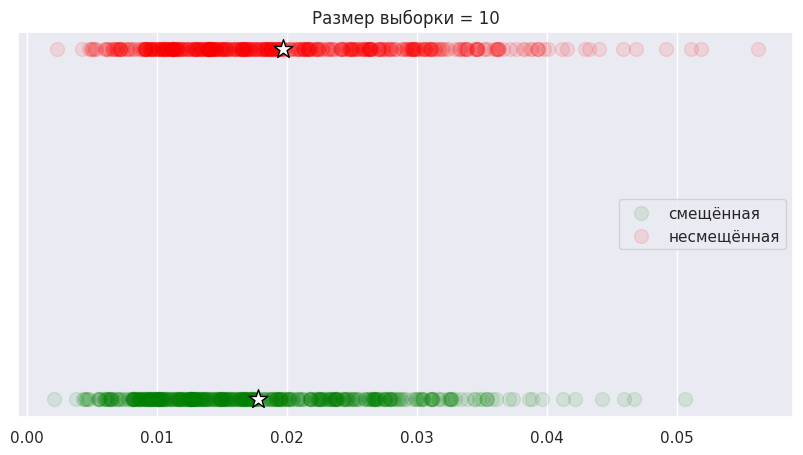

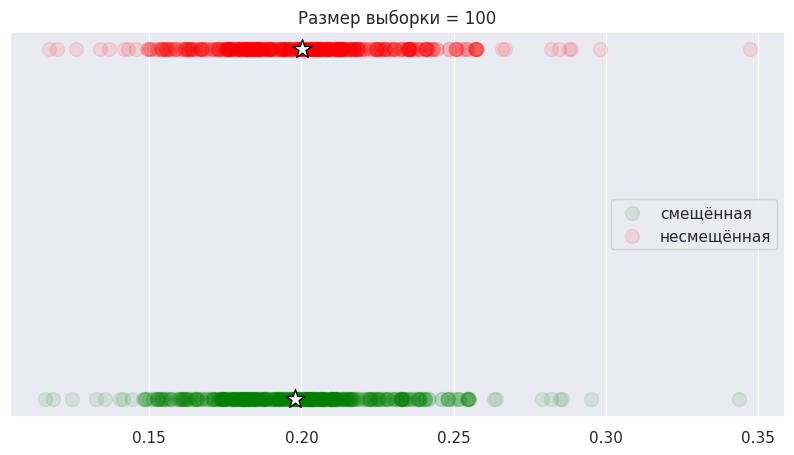

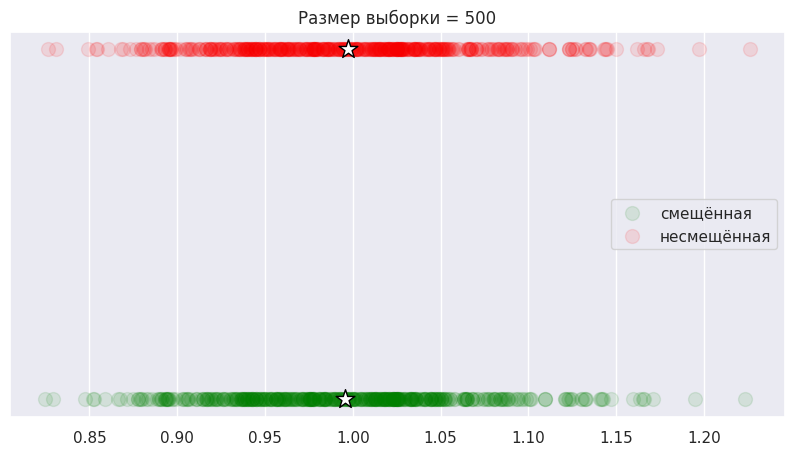

In [64]:
k = 500;
n_values = [10, 100, 500];

def CalculateEstimate(data):
    """
        data - numpy.ndarray(m, n)
    """
    tmp = copy.deepcopy(data);

    n = tmp.shape[0];

    mean = tmp.mean(axis=1);
    mean = mean.reshape((mean.shape[0], 1));
    tmp -= mean;

    tmp = tmp ** 2;

    tmp = tmp.sum(axis=1);
    return (1/n) * tmp;

def EstimatesGraph(k, n, scale=1):
    data = sts.norm(scale=scale).rvs((k, n));

    estimates = CalculateEstimate(data);

    # Вначале:
    plt.figure(figsize=(10,5))

    # Для каждой оценки:
    # y - номер оценки
    plt.scatter(estimates, np.zeros(k) + 0,
            alpha=0.1, s=100, color="green", label="смещённая")
    plt.scatter(estimates.mean(), 0, marker='*', s=200,
            color='w', edgecolors='black')

    estimates = estimates * (n / (n - 1));

    plt.scatter(estimates, np.zeros(k) + 0.2,
            alpha=0.1, s=100, color="red", label="несмещённая")
    plt.scatter(estimates.mean(), 0.2, marker='*', s=200,
            color='w', edgecolors='black')

    # Для всего графика:
    #plt.vlines(1, 0, 1, color='r')
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend()

EstimatesGraph(k, 10)
EstimatesGraph(k, 100)
EstimatesGraph(k, 500)

**2.** Изучим поведение среднего оценок из первого пункта при росте размера выборки. Постройте график зависимости $\widetilde{\theta}$ от $n$ для двух типов оценок. Для вычисления зависимости нужно один раз сгенерировать выборки из пункта 1 достаточно большого размера (не более 500) и посчитать оценки по подвыборкам, используя <a href="https://miptstats.github.io/courses/python/05_numpy.html#2.1-Математические-операции">функции</a> из `numpy`. Использовать циклы, а так же функции, разворачивающиеся в цикл (например, `np.vectorize`), запрещено.

**Решение:**

In [4]:
n = 500;
samples = sts.norm(loc=0, scale=1).rvs(n);
cumsum = samples.cumsum();
means = cumsum / np.arange(1, n + 1);
squares = samples ** 2;

first_estimate = (1 / np.arange(1, n + 1)) * (squares.cumsum() + (-2 * means) * (cumsum) + (means ** 2 * np.arange(1, n+1)));
second_estimate = (np.arange(1, n + 1) / np.insert(np.arange(1, n), 0, [1]) ) * first_estimate;

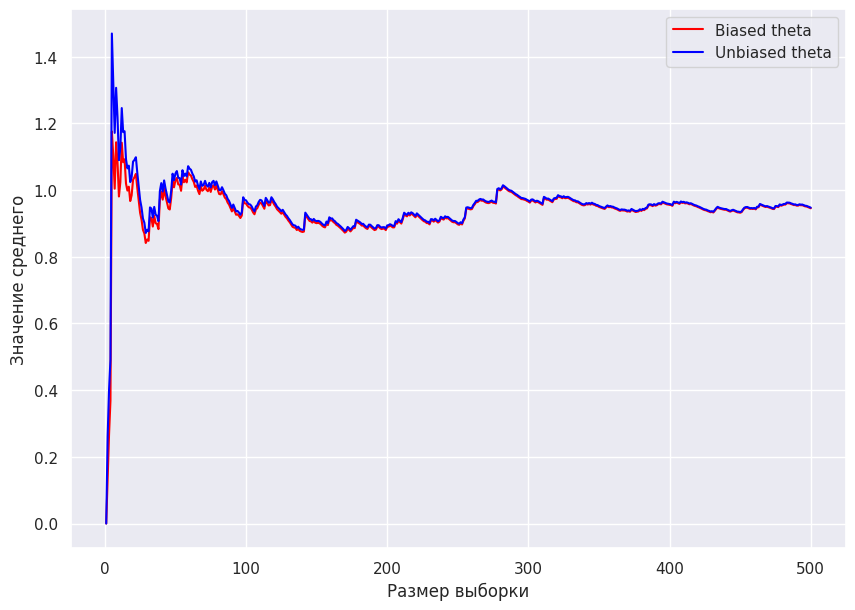

In [5]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(10, 7));

    sns.lineplot(x=np.arange(1, n+1), y = first_estimate, color='red',label="Biased theta")
    sns.lineplot(x=np.arange(1, n+1), y = second_estimate, color='blue', label='Unbiased theta')

    ax.set_xlabel("Размер выборки")
    ax.set_ylabel("Значение среднего")

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты полученное в теоретических задачах свойство несмещенности (или отсутствие этого свойства) данных оценок?

*Для ПМФ:* поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

*Замечание.* Для ответа на вопрос достаточно понимания текущего материала, ничего из физики знать не требуется.

**Вывод:** На графике видно, что смещённая оценка стремится к 1(дисперсии) медленнее, чем несмещённая, что понятно из теоретического задания, где было установленно что математическое ожидание смещённой оценки равно $\frac{n-1}{n}$ < 1. Свойство несмещённости оценки говорит нам, что её мат ожидание равно исходному параметру, который мы оцениваем.

*Замечание.* Проведенные эксперименты позволяют сделать вывод только о поведении среднего значения оценки, но ничего не говорят о том, насколько велик их разброс относительно среднего.

---
### Задача 3.

Рассмотрим задачу построения системы, автоматически классифицирующей поступающие новостные сюжеты на несколько заранее заданных категорий.

![news.jpg](attachment:news.jpg)



Перед выполнением задачи обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [3]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [7]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [8]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [9]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Разделите данные на обучающую, валидационную и тестовую части

In [8]:
category_names = np.array(data_train["target_names"]);
train_y = np.array(data_train["target"]);
train_x = np.array(data_train["data"]);

test_y = np.array(data_test["target"]);
test_x = np.array(data_test["data"]);

validate_y = test_y[:(test_y.shape[0] // 2)];
validate_x = test_x[:(test_y.shape[0] // 2)];

test_y = test_y[(validate_x.shape[0] // 2):]
test_x = test_x[(validate_x.shape[0] // 2):]

print(test_x[0])

In article <16BB8C820.SBANKA@VM.TEMPLE.EDU>
SBANKA@VM.TEMPLE.EDU writes:
 
>I'd appreciate any help anyone could give me on these two questions:
>
>The Brady Bill was in the news throughout 1992 but what actually happened to
>it in Congress?  Did Bush veto it?  If so, when?
 
       The Brady Bill passed the House in 1992, but failed to reach a
vote in the Senate.  As such, it never reached Bush.  (Sarah Brady's
condemnation not-withstanding).
 
       It'll probably pass the House again, and will probably pass the
Senate if they can get it to a vote.  Whether of not they'll be busy
with other things will be the question.  I don't expect gung-ho opposition
on the part of Senate Republicans, since they won't want to over-use their
fillibuster trump card.
 


Прежде чем приступать к построению сложных систем всегда стоит выбрать простой бейзлайн &mdash; модель, которую вы можете получить относительно быстро, и она не занимает много ресурсов.

В качестве бейзлайна рассмотрим простую модель, обученную на представлении текстов в виде мешка слов (bag of words). Мы можем обучить два известных нам классификатора:
* метод ближайших соседей,
* наивный байесовский классификатор.

Подумайте, почему метод ближайших соседей не подходит для решения данной задачи.

**Ответ:** Метод ближайших соседей здесь не сработает, т.к он не различает слова, он просто считает расстояние между точками вида $(x_1, \dots x_n)$, где $x_i$ - сколько раз встретилось i-е слово в некотором тексте, $\vert(0,1,0)\vert = \vert(1,0,0)\vert$. Наивный Байес различает слова, но не их порядок

Обучите наивный байесовский классификатор, подобрав также для него оптимальные гиперпараметры. В качестве гиперпараметров можно рассмотреть, например, параметры мешка слов.

Для выполнения этой процедуры зафиксируйте несколько комбинаций значений гиперпараметров, для каждой из них обучите модель по обучающей части выборки и посчитайте качество (точность классификации) на валидационной части. Выберите классификатор, дающий максимальную точность.

Давайте выберем параметры для мешка слов, размер мешка(max_features) 1000, 10000, 20000, min_df - 0.01, 0.05

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [12]:
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('clf', MultinomialNB()),
])


parameters = {
     'vect__max_features': [1000, 10000, 20000],
     'clf__alpha': (1, 1e-1, 1e-2),
}

gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=1)

In [13]:
gs_clf = gs_clf.fit(validate_x[:1000], validate_y[:1000])

In [14]:
for param_name in sorted(parameters.keys()):
     print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.01
vect__max_features: 20000


Посчитайте качество на тестовой выборке.

In [15]:
predicted = gs_clf.predict(validate_x);
print(np.mean(predicted == validate_y))

0.772437599575146


Выберите некоторую нейросеть для классификации текстов. Вы можете выбрать готовую нейросеть и дообучить ее на рассматриваемых данных, как это сделано на <a href="https://miptstats.github.io/courses/ad_fivt/bayes_classification.html">семинаре</a>, так и самостоятельно написать нейросеть.

In [4]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from IPython.display import clear_output

#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torchtext
!pip show torchtext
from torchtext.data.utils import get_tokenizer

import seaborn as sns

sns.set(palette="Set2")
sns.set_style("whitegrid")

import nltk

nltk.download("stopwords")

device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda" if torch.cuda.is_available() else "cpu"
)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Name: torchtext
Version: 0.17.1
Summary: Text utilities, models, transforms, and datasets for PyTorch.
Home-page: https://github.com/pytorch/text
Author: PyTorch Text Team
Author-email: packages@pytorch.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, requests, torch, torchdata, tqdm
Required-by: 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Зададим токенизаторы
tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
print(type(tokenizer))
stop_words = nltk.corpus.stopwords.words("english")  # стоп-слова

punc = list(punctuation)  # пунктуация
punc.append(' ');

<class 'functools.partial'>


In [9]:
i = 0;
ordered_dict = {};
MAX_VOCAB_SIZE = gs_clf.best_params_["vect__max_features"];

for text in train_x:
  tokens = tokenizer(str(text));
  tokens = [w for w in tokens if not w.lower() in stop_words and not w in punc]

  for token in tokens:
    if token not in ordered_dict:
      ordered_dict[token] = 1;
    else:
      ordered_dict[token] += 1;
  i += 1;
  if i >= 10000:
    break
ordered_dict = Counter(ordered_dict).most_common(MAX_VOCAB_SIZE)


In [10]:
ordered_dict = dict(ordered_dict)

In [11]:
# зададим словарь

vocab = torchtext.vocab.vocab(ordered_dict)

unk_token = "<unk>"
pad_token = "<pad>"


def add_special_tokens(vocab):
    """Функция для добавления специальных токенов в словарь."""
    for special_token in [unk_token, pad_token]:
        vocab.append_token(special_token)
    vocab.set_default_index(vocab[unk_token])
    UNK_IDX = vocab[unk_token]
    PAD_IDX = vocab[pad_token]
    return vocab, UNK_IDX, PAD_IDX


vocab, UNK_IDX_EN, PAD_IDX_EN = add_special_tokens(vocab)
num_tokens = len(vocab)

In [12]:
class TextClassificationDataset(Dataset):
    """Класс датасета для предсказания зарплаты"""

    def __init__(self, texts, target, smart_pad_collate=False):
        """
        Параметры.
        1) texts (list) — корпус токенизированных текстов, на котором будет
                          происходить обучение
        2) labels (list) — истинные метки текстов
        """
        self.texts = texts
        self.target = target

        if smart_pad_collate:
            self.texts.sort(key=len)
    def __len__(self):
        return len(self.target)

    def __getitem__(self, idx):
        return self.texts[idx], self.target[idx]

In [13]:
def pad_collate(batch):
    """
    Формирует тензоры из токенизированных текстов и меток, а также
    дополняет последовательности токенов до максимальной длины в батче с UNK_IDX
    """
    texts, labels = zip(*batch)

    # сформируем тензоры
    texts_tensors = [torch.LongTensor(t) for t in texts]
    labels = torch.FloatTensor(labels)

    # дополним до макс. длины в батче
    texts_tensors = pad_sequence(
        texts_tensors, padding_value=PAD_IDX_EN, batch_first=True
    )

    return texts_tensors, labels

In [14]:
def create_one_hot_vector(i, size):
    vector = np.zeros(size)
    vector[i] = 1
    return vector

In [15]:
tokens = [vocab(tokenizer(str(text))) for text in train_x]
target = [create_one_hot_vector(value, 21) for value in train_y]

In [16]:
train_tokens, valid_tokens, train_target, valid_target = train_test_split(
    tokens, target
)

In [17]:
train_data = TextClassificationDataset(train_tokens, train_target, True)
valid_data = TextClassificationDataset(valid_tokens, valid_target, True)
len(train_data), len(valid_data)

(8485, 2829)

In [24]:
from torch.utils.data import Sampler
from typing import List, Iterator
BATCH_SIZE = 32  # размер батча

class AccedingSequenceLengthBatchSampler(Sampler[List[int]]):
    def __init__(self, data: List[str], batch_size: int) -> None:
         self.data = data
         self.batch_size = batch_size

    def __len__(self) -> int:
         return (len(self.data) + self.batch_size - 1) // self.batch_size

    def __iter__(self) -> Iterator[List[int]]:
         sizes = torch.tensor([len(x) for x in self.data])
         for batch in torch.chunk(torch.argsort(sizes), len(self)):
             yield batch.tolist()

# сформируем даталоадеры

train_batch_sampler = AccedingSequenceLengthBatchSampler(train_data, BATCH_SIZE)
valid_batch_sampler = AccedingSequenceLengthBatchSampler(valid_data, BATCH_SIZE)

train_loader = DataLoader(
    train_data, batch_sampler=train_batch_sampler, collate_fn=pad_collate
)

valid_loader = DataLoader(
    valid_data, batch_sampler=valid_batch_sampler, collate_fn=pad_collate
)


In [25]:
class SimpleRNNRegressor(nn.Module):
    """ Модель для регрессии на основе LSTM"""

    def __init__(
        self,
        num_tokens,
        emb_size=512,
        rnn_num_units=1,
        output_dim=1
    ):
        """
        1) num_tokens — общее количество токенов,
        2) emb_size — размер эмбеддингового пространства,
        3) rnn_num_units - размер пространства скрытых представлений в rnn,
        4) output_dim - размерность выхода-предсказания.
        """
        super(self.__class__, self).__init__()

        self.num_tokens = num_tokens;
        self.emb_size = emb_size;
        self.rnn_num_units = rnn_num_units;
        self.output_dim = output_dim;

        self.emb = nn.Embedding(num_tokens, emb_size);
        self.rnn = nn.LSTM(emb_size, rnn_num_units, batch_first=True);
        self.linear = nn.Linear(in_features=rnn_num_units, out_features=output_dim);
        self.prob = nn.Softmax(dim=0);

    def forward(self, x):
        """
        x.shape = (batch_size, max_pad_len)

        Возвращает:
        * predictions - предсказания модели.
        """
        embed = self.emb(x);

        h_0 = torch.zeros((1, x.shape[0], self.rnn_num_units)).to(device);
        c_0 = torch.zeros((1, x.shape[0], self.rnn_num_units)).to(device);
        #print(x.shape)
        _, (final_hidden, _) = self.rnn(embed, (h_0, c_0));

        return self.prob(self.linear(final_hidden[-1]));

In [26]:
def mse(preds, y):
    """
    Возвращает среднеквадратичную ошибку модели.

    Параметры.
    1) preds — предсказания модели,
    2) y — истинные значения таргета.
    """

    return F.mse_loss(preds, y, reduction="mean")

In [44]:
def train(model, iterator, optimizer, criterion, train_loss_history):
    """
    Функция для обучения модели на обучающем датасете и подсчёта
    её ошибки.

    Параметры.
    1) model — модель,
    2) iterator — итератор обучающего датасета,
    3) optimizer — класс метода оптимизации,
    4) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_mse = 0
    model.train()

    # Проход по всему датасету
    for batch_id, batch in enumerate(iterator):
        # чтобы градиент не накапливался, его нужно обнулить
        optimizer.zero_grad()
        # получим предсказания модели
        texts, labels = batch
        texts, labels = texts.to(device), labels.to(device)
        predictions = model(texts)

        loss = criterion(predictions, labels.float())
        err = mse(predictions, labels)

        # сделаем back-propagation для подсчёта градиентов
        loss.backward()
        # выполним шаг оптимизатора
        optimizer.step()
        # обновим метрики
        epoch_loss += loss.item()
        epoch_mse += err.item()
        train_loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_mse / len(iterator)


def evaluate(model, iterator, criterion, val_loss_history=None, additional_arr=None, additional_function=None):
    """
    Функция для применения модели на валидационном/тестовом датасете и подсчёта
    её точности.

    Параметры.
    1) model — модель,
    2) iterator — итератор датасета,
    3) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_mse = 0

    model.eval()

    with torch.no_grad(): # отключим подсчёт градиентов на валидации
        # Проход по всему датасету
        for batch_id, batch in enumerate(iterator):
            # Обучение на 1 батче, подсчет метрики
            texts, labels = batch
            texts, labels = texts.to(device), labels.to(device)
            # получим предсказания
            predictions = model(texts);

            # посчитаем метрики
            loss = criterion(predictions, labels.float())
            m = mse(predictions, labels.squeeze(1))

            additional_arr.append(additional_function(predictions.detach().cpu().numpy(), labels.detach().cpu().numpy()));

            # обновим метрики
            epoch_loss += loss.item()
            epoch_mse += m.item()
            if val_loss_history is not None:
                val_loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_mse / len(iterator)


def epoch_time(start_time, end_time):
    """
    Функция для подсчёта времени работы одной эпохи.

    Параметры.
    1) start_time — время начала запуска,
    2) end_time — время завершения работы эпохи.
    """

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [28]:
def visualize_epoch(epoch, start_time, loss_history, mse_history):
    """
    Функция для визуализации 1 эпохи.

    Параметры.
    1) epoch — номер эпохи,
    2) start_time — время начала эпохи,
    3) loss_history - tuple истории лосса на train и test,
    4) mse_history - tuple истории MSE на train и test.
    """
    # Посчитаем время работы одной эпохи
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Отобразим графики лоссов
    clear_output(True)
    plt.figure(figsize=(18, 6))

    train_loss_history, val_loss_history = loss_history
    plt.subplot(1, 3, 1)
    plt.plot(train_loss_history)
    plt.title("Train Loss")
    plt.xlabel("Номер батча")
    plt.subplot(1, 3, 2)
    plt.plot(val_loss_history, color="tab:orange")
    plt.title("Valid Loss")
    plt.xlabel("Номер батча")

    # Отрисуем значение MSE от эпохи
    train_mse_history, val_mse_history = mse_history
    plt.subplot(1, 3, 3)
    plt.plot(train_mse_history, label="Train")
    plt.plot(val_mse_history, label="Valid")
    plt.legend()
    plt.title("MSE")
    plt.xlabel("Номер эпохи")
    plt.show()

    print(
        f"Номер эпохи: {epoch+1:02} | Время обучения эпохи: {epoch_mins}m {epoch_secs}s"
    )


def training_loop(model_instance, n_epochs=10):
    """
    Функция для обучения нейронной сети.

    Параметры.
    1) model_instance — обучаемая модель,
    2) n_epochs — количество эпох.
    """

    best_valid_loss = float("inf")
    train_loss_history = []
    val_loss_history = []
    train_mse_history = []
    val_mse_history = []

    for epoch in range(n_epochs):
        start_time = time.time()
        # Обучим одну эпоху на обучающем датасете
        train_loss, train_mse = train(
            model_instance,
            train_loader,
            optimizer,
            criterion,
            train_loss_history,
        )
        train_mse_history.append(train_mse)

        # Оценим ошибку модели на тестовом датасете
        valid_loss, valid_mse = evaluate(
            model_instance, valid_loader, criterion, val_loss_history
        )
        val_mse_history.append(valid_mse)

        # Если значение функции потерь улучшилось, сохраним параметры модели
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model_instance.state_dict(), "model_checkpoint.pt")

        # Визуализируем результаты эпохи
        visualize_epoch(
            epoch,
            start_time,
            (train_loss_history, val_loss_history),
            (train_mse_history, val_mse_history),
        )

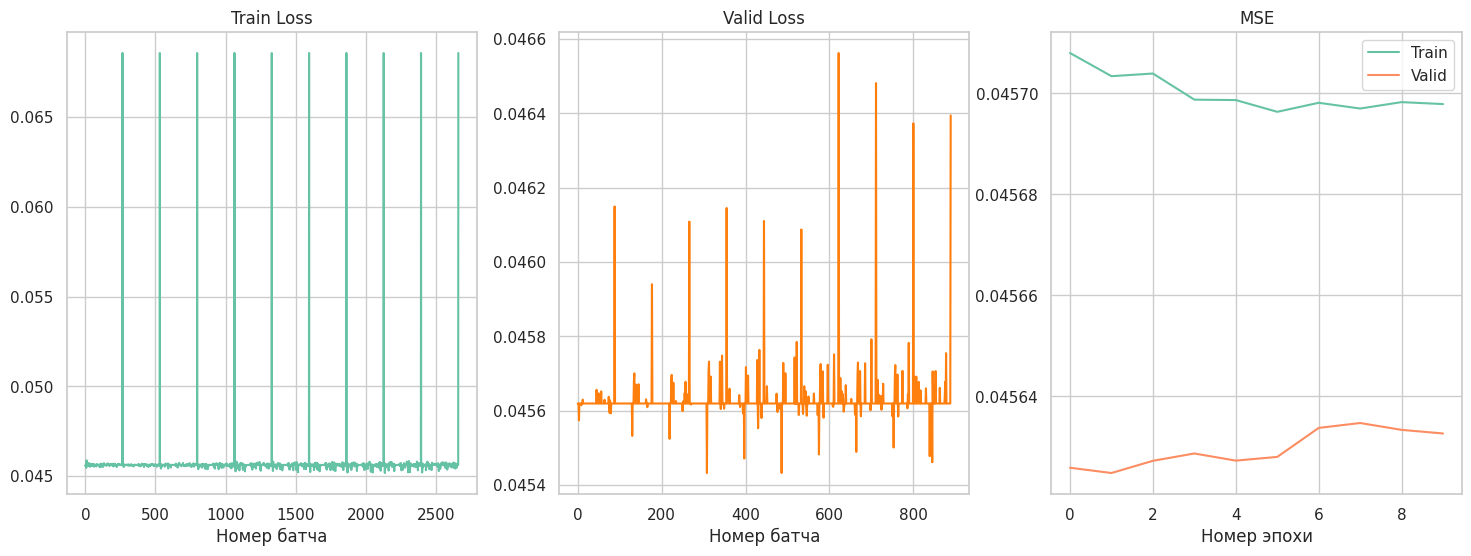

Номер эпохи: 10 | Время обучения эпохи: 0m 2s


In [32]:
# Задайте параметры сети
model = SimpleRNNRegressor(len(vocab), 512, 1, 21).to(device)
print(model)

# У нас задача регрессии, будем использовать MSELoss
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
loss_history = []


# Посмотрите на получившуюся модель
model

training_loop(model, n_epochs=10)

Сравните качество моделей на тестовой выборке. Можно ли с уверенностью утверждать, что одна из моделей лучше другой?

нет, нельзя нужно провести t-test и статистически доказать это утверждение

In [60]:
def additional_function(pred, target):
    print(target)
    pred = [create_one_hot_vector(value, 21) for value in np.argmax(pred,axis=1)]
    comparison = np.all(pred[:, None, :] == target, axis=-1)
    print(comparison)
    return 1;

abc = [];

valid_loss, valid_mse = evaluate(
            model, valid_loader, criterion, [], abc, additional_function
        );


print(f"MSE on valid: {valid_loss}")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0.

TypeError: list indices must be integers or slices, not tuple

Сделайте выводы.

---
### Задача 4.

Пусть $\mathscr{X} = \mathbb{R}^d$ — пространство признаков, $\mathscr{Y} = \{0, 1\}$ — множество классов. Рассматривается квадратичный дискриминантный анализ (QDA), в котором условное распределение $X$ при условии $Y=k$ равно $\mathcal{N}(a_k, \Sigma_k)$. Разделяющей поверхностью между классами $k$ и $\ell$ называется множество точек пространства признаков, для которых вероятность этих двух классов одинакова.

**1.**
Покажите, что в модели QDA разделяющие поверхности в общем случае квадратичны, а в LDA &mdash; линейны между любыми двумя классами.

*Примечание.* В LDA предполагается $\Sigma_1 = ... = \Sigma_k$.

**2.**
Рассмотрим квадратичный дискриминантный анализ при $d=2$. Приведите примеры таких параметров $a_k, \Sigma_k$ и вероятностей $\mathsf{P}(Y = k)$, при которых разделяющая поверхность является
* гиперболой;
* параболой;
* двумя параллельными прямыми;
* двумя пересекающимися прямыми.

*Примечание.* Можно подобрать выборку, посчитать оценки со страшными числами. Но еще лучше &mdash; немного подумать и привести пример с "красивыми" числами без какого-либо подбора выборки. В данном случае это довольно просто, а также позволяет лучше разобраться в параметрах многомерного нормального распределения.
